In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Q2

In [65]:
y = np.array([83, 42, 79, 16, 24, 73, 60, 44, 47, 67])
x = np.array([18.1, 8, 16.8, 2.8, 3.9, 12.7, 11.5, 9.5, 8.0, 13.2])


Liner regression fitting of model $ y = mx $

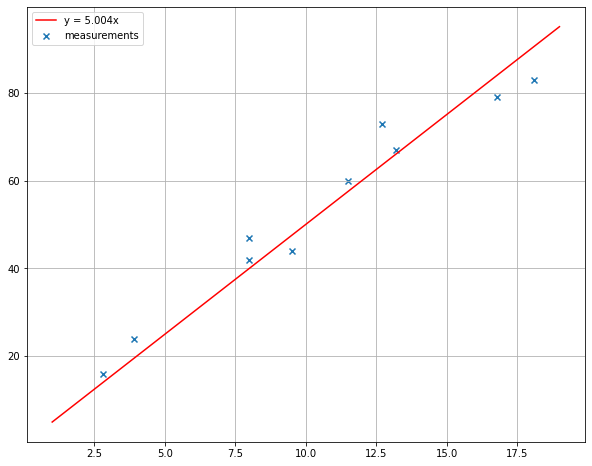

In [25]:
# mean vector of x*y
mxy = np.mean(x * y)
#print(mxy)
# mean vector of x^2
mx2 = np.mean(x * x)
#print(mx2)
m = mxy / mx2

x_range = np.arange(1, 20)
fig = plt.figure(figsize=(10,8))
plt.scatter(x, y, label="measurements", marker="x")
plt.plot(x_range, x_range*m, label=f"y = {m:.3f}x", color="r")
plt.legend()
plt.grid(True)
plt.show()

Quadratic regression for $y = a_2x^2 + a_1x + a_0$

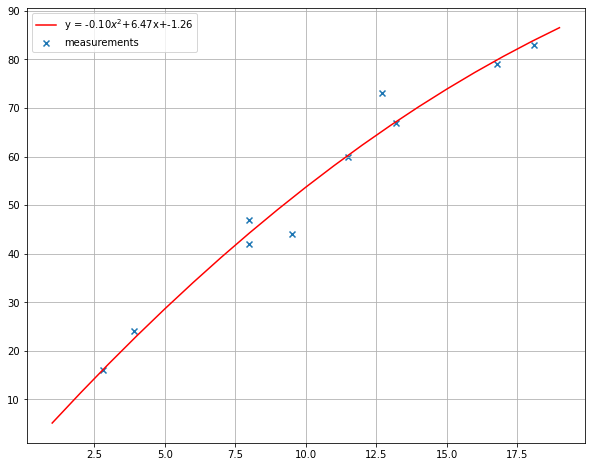

In [36]:
a1 = np.array(x * x)
a2 = np.array(x)
a3 = np.ones(a2.shape)
A = np.stack((a1, a2, a3)).T
#print(A.shape)
#print(y.shape)
B = A.T @ y[:, np.newaxis]

# Quadratic coefficient vector a
a = np.linalg.solve(A.T@A,  B).flatten()

# Plotting
x_range = np.arange(1, 20)
fig = plt.figure(figsize=(10,8))
plt.scatter(x, y, label="measurements", marker="x")
plt.plot(x_range, a[0]*np.multiply(x_range,x_range)+a[1]*x_range+a[2], label=f"y = {a[0]:.2f}$x^2$+{a[1]:.2f}x+{a[2]:.2f}", color="r")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
np.multiply(x, x)

array([327.61,  64.  , 282.24,   7.84,  15.21, 161.29, 132.25,  90.25,
        64.  , 174.24])

Plotting for Q2(d)

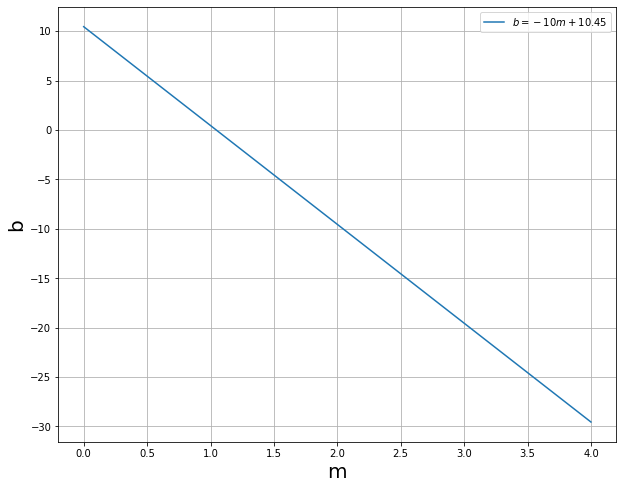

In [78]:

# Plotting
m_range = np.arange(0, 5)
b = -10*m_range + 10.45
fig = plt.figure(figsize=(10,8))
plt.plot(m_range, b, label="$b=-10m+10.45$")
plt.legend()
plt.grid(True)
plt.xlabel("m",fontsize=20)
plt.ylabel("b",fontsize=20)
plt.show()

### Q5(b)

Prepare the initial values and matrix A. Calculate input vector $u$ using $\hat{u} = A^T(AA^T)^{-1}b$

In [47]:
N = 120
waypoint_idx = [20, 35, 60]
A = np.empty((len(waypoint_idx)*2, N))
i = 0
for idx in waypoint_idx:
    A1 = [0 if i % 2 != 0 else idx - i/2 for i in range(idx*2)]
    A1 = A1 + (N - len(A1))*[0.0]
    A1 = np.array(A1)[np.newaxis,:] 
    A2 = [0 if i % 2 == 0 else idx+1 - (i+1)/2 for i in range(idx*2)]
    A2 = A2 + (N - len(A2))*[0.0]
    A2 = np.array(A2)[np.newaxis,:] 
    A[i,:] = A1
    A[i+1,:] = A2
    i += 2

b = np.array([3,2,6,-1,0,0])[:,np.newaxis]
u = A.T@np.linalg.inv((A@A.T))@b

Generate vector $x$ as a function of time $t$

In [48]:
x = np.empty((61,2))
# Force to create a column vector
x0 = np.array([[1, 1]]).T
v0 = np.array([[0, 0]]).T
xt = x0
vt = v0
x[0,:] = x0.flatten()
for dt in range(60):
    vt = vt + u[2*dt:2*dt+2,:]
    xt = xt + vt
    x[dt+1] = xt.flatten()

Plot trajectory $x$

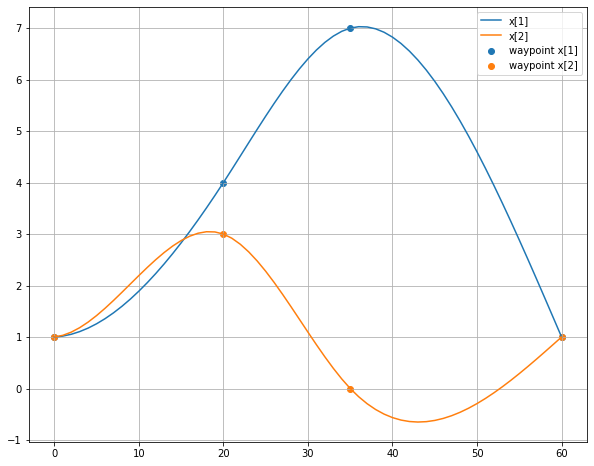

In [14]:
t = np.linspace(0, 60, 61)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.plot(t,x,label=['x[1]','x[2]'])
ax.scatter([0,20,35,60],[1,4,7,1],label='waypoint x[1]')
ax.scatter([0,20,35,60],[1,3,0,1],label='waypoint x[2]')
ax.grid(True)
ax.legend()
plt.show()

### Q5(c)

Generate vector $u_t$ as a function of $t$ and plot it.

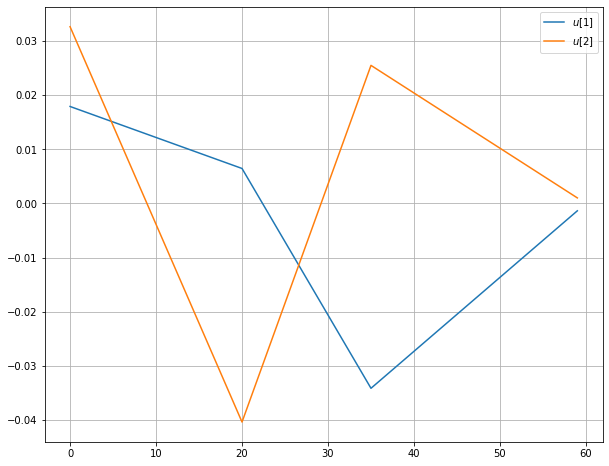

In [49]:
ut = u.reshape((60, 2))
t = np.linspace(0, 59, 60)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.plot(t, ut, label=['$u[1]$', '$u[2]$'])
ax.grid(True)
ax.legend()
plt.show()

### Q6(b)

Prepare the data

In [51]:
t = np.arange(1, 501)   # time points
ytrue = 2*np.sin(t/50) + np.cos(t/20)   # true signal
np.random.seed(1)
ymeas = ytrue + np.random.randn(1,500)  # noisy measuremnet
ymeas = ymeas.T
print(ymeas.shape)

(500, 1)


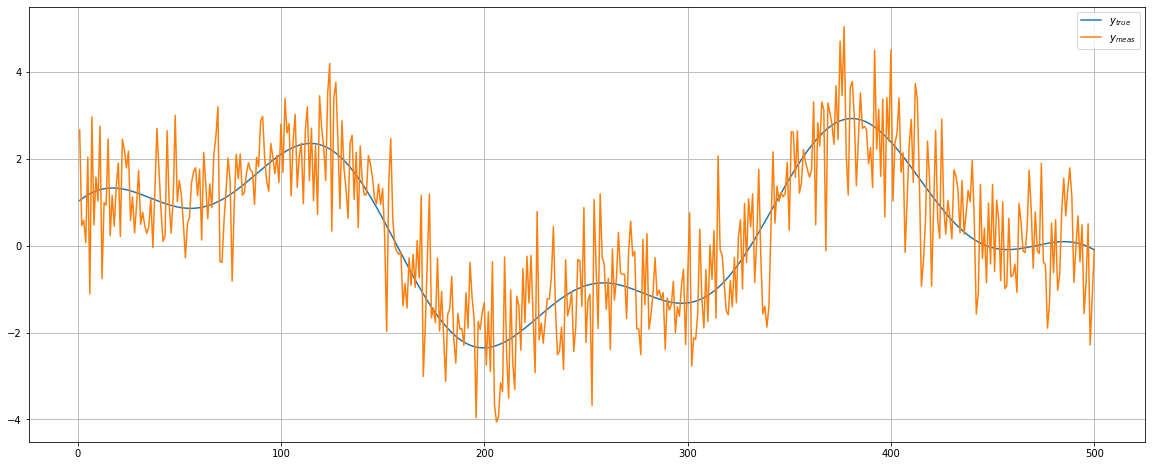

In [61]:
fig = plt.figure(figsize=((20,8)))
plt.plot(t,ytrue,label="$y_{true}$")
plt.plot(t,ymeas,label="$y_{meas}$")
plt.grid(True)
plt.legend()
plt.show()

Generate transformed A, x and b

In [55]:
def generateProblem(lamb = 4):
    L1 = np.sqrt(lamb) * np.identity(499) 
    L2 = -np.sqrt(lamb) * np.identity(499)
    L1 = np.hstack((L1, np.zeros((499, 1))))
    L2 = np.hstack((np.zeros((499, 1)), L2))
    L = L1 + L2
    I = np.identity(500)
    A = np.vstack((L, I))
    #print(A.shape)
    b = np.vstack((np.zeros((499,1)), ymeas))
    # print(b.shape)
    return (A, b)

Calculate $y_{est}$

In [56]:
def calculateEstimate(lamb = 4):
    A, b = generateProblem(lamb)
    
    # Directly use np.linalg.inv (not recommended, slower)
    yest = np.linalg.inv(A.T@A)@A.T@b
    # Use np.linalg.solve (recommended, faster)
    yest = np.linalg.solve(A.T@A, A.T@b)
    
    return yest

Plot $y_{est}$ with different $\lambda$

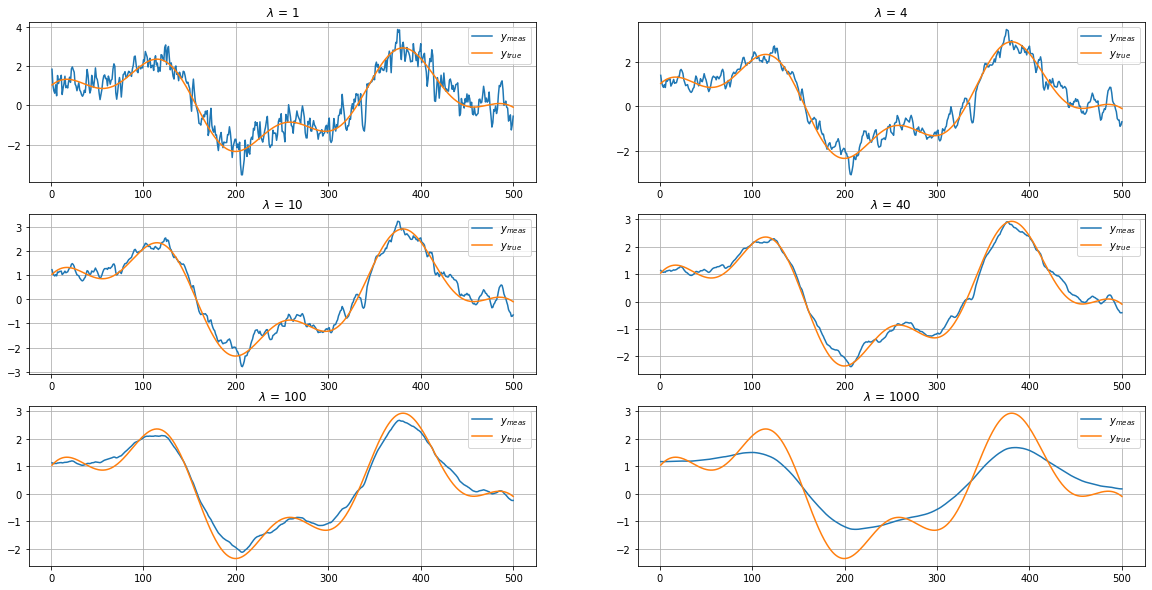

In [57]:
t = np.arange(1, 501)
fig = plt.figure(figsize=(20,10))
lambs = [1,4,10,40,100,1000]
for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    yest = calculateEstimate(lambs[i])
    ax.plot(t, yest.flatten(), label='$y_{meas}$')
    ax.plot(t, ytrue.flatten(), label='$y_{true}$')
    ax.grid(True)
    ax.legend()
    ax.set_title(f'$\lambda$ = {lambs[i]}')

### Q6(c)

Edit the `generateProblem` and `calculateEstimate` function to penalize curvature

In [58]:
def generateProblem(lamb = 4):
    L1 = np.sqrt(lamb) * np.identity(498) 
    L2 = -2*np.sqrt(lamb) * np.identity(498)
    L3 = np.sqrt(lamb) * np.identity(498)
    L1 = np.hstack((L1, np.zeros((498, 2))))
    L2 = np.hstack((np.zeros((498, 1)), L2, np.zeros((498,1))))
    L3 = np.hstack((np.zeros((498, 2)), L3))
    L = L1 + L2 + L3
    I = np.identity(500)
    A = np.vstack((L, I))
    #print(A.shape)
    b = np.vstack((np.zeros((498,1)), ymeas))
    #print(b.shape)
    return (A, b)

def calculateEstimate(lamb = 4):
    A, b = generateProblem(lamb)
    
    # Directly use np.linalg.inv (not recommended, slower)
    yest = np.linalg.inv(A.T@A)@A.T@b
    # Use np.linalg.solve (recommended, faster)
    yest = np.linalg.solve(A.T@A, A.T@b)
    
    return yest

Plot $y_{est}$ with different $\lambda$

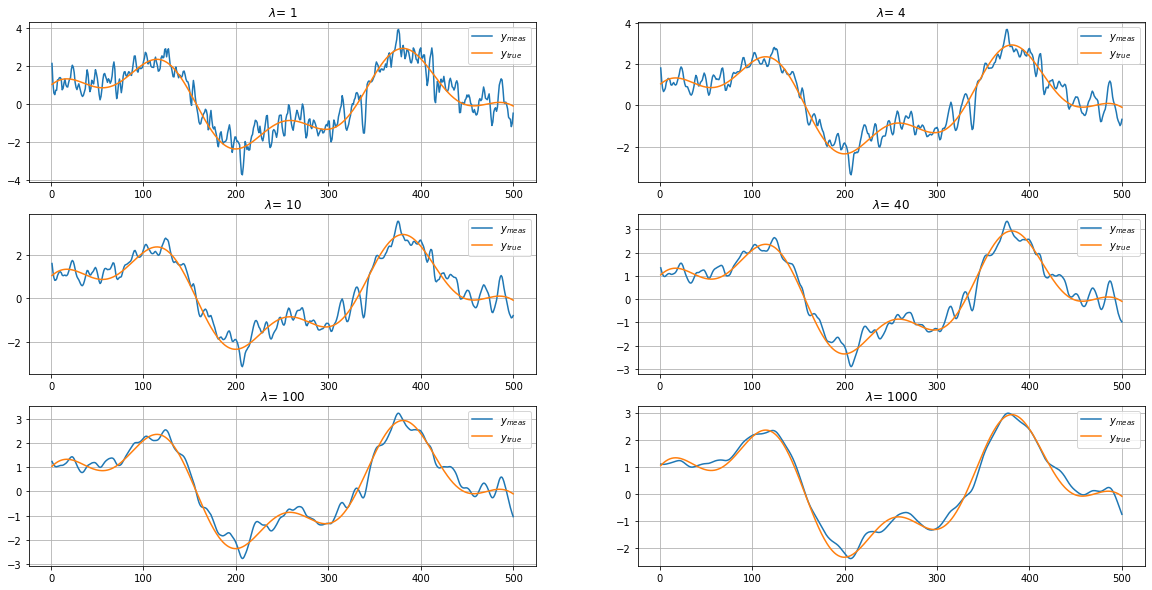

In [60]:
t = np.arange(1, 501)
fig = plt.figure(figsize=(20,10))
lambs = [1,4,10,40,100,1000]
for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    yest = calculateEstimate(lambs[i])
    ax.plot(t, yest.flatten(), label='$y_{meas}$')
    ax.plot(t, ytrue.flatten(), label='$y_{true}$')
    ax.grid(True)
    ax.legend()
    ax.set_title(f'$\lambda$= {lambs[i]}')